# Vue 06 Vue Router

## Routing

### 개요

#### Routing
네트워크에서 경로를 선택하는 프로세스 

(urls.py 에서 하던 것들)
- > 웹 애플리케이션에서 다른 페이지 간의 전환과 경로를 관리하는 기술

#### SSR에서의 Routing
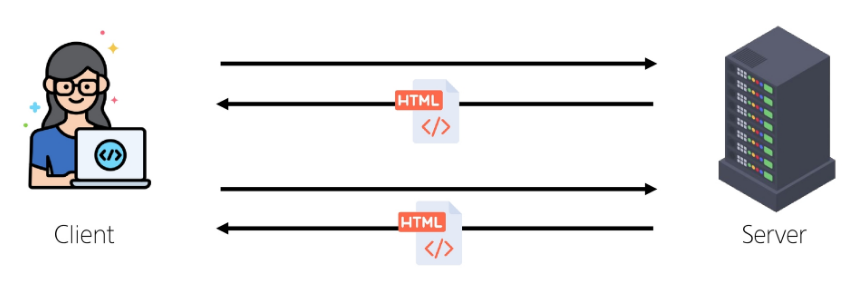

- SSR에서 routing은 서버 측에서 실행

- 서버는 사용자가 방문한 URL 경로를 기반으로 응답을 전송
- 링크를 클릭하면 브라우저는 서버로부터 HTML 응답을 수신하고 새 HTML로 전체 페이지를 다시 로드

#### CSR에서의 Routing
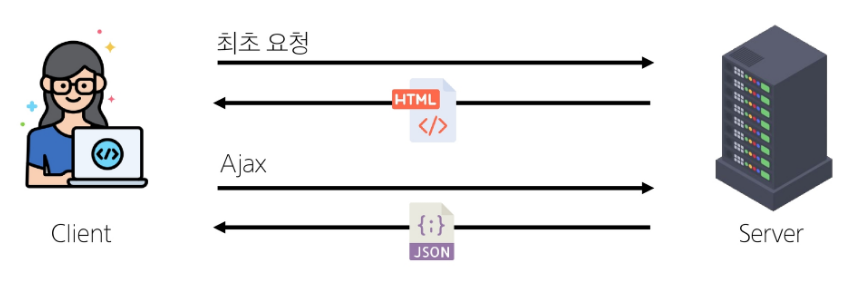

- CSR에서 routing은 `클라이언트 측`에서 수행
- 클라이언트 측 JavaScript가 새 데이터를 동적으로 가져와 전체 페이지를 다시 로드하지 않음

#### SPA에서 Routing이 없다면 
- 유저가 URL을 통한 페이지의 변화를 감지할 수 없음 

- 페이지가 무엇을 렌더링 중인지에 대한 상태를 알 수 없음 
    - `URL이 1개`이기 때문에 새로 고침 시 처음 페이지로 되돌아감 
    - 링크를 공유할 시 첫 페이지만 공유 가능 
- `브라우저의 뒤로 가기 기능을 사용할 수 없음 `
- > `페이지는 1개`이지만, `주소`에 따라 여러 컴포넌트를 `새로 렌더링`하여 마치 여러 페이지를 사용하는 것처럼 보이도록 해야 함

## Vue Router

### 개요

#### Vue Router 
Vue 공식 라우터(The official Router for Vue.js)

#### 사전 준비
- Vite로 프로젝트 생성 시 Router 추가

    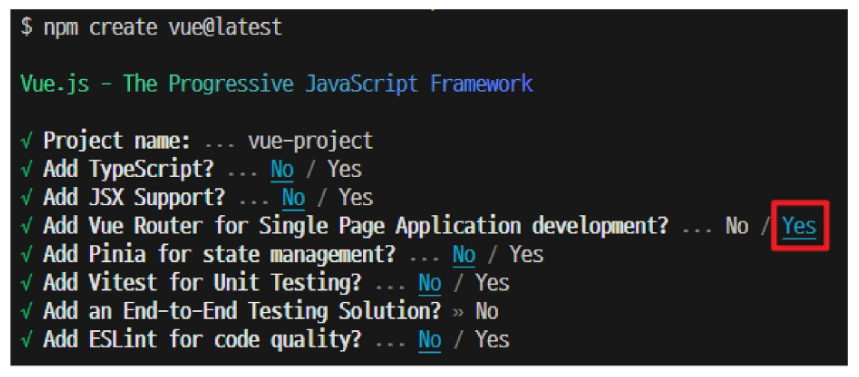

- 서버 실행 후 Router로 인한 프로젝트 변화 확인 
- >Home, About 링크에 따라 변경되는 URL과 새로 렌더링 되는 화면

    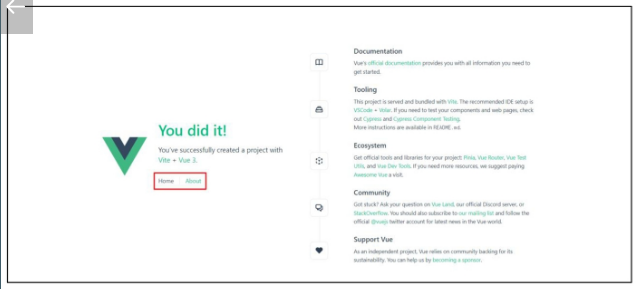

    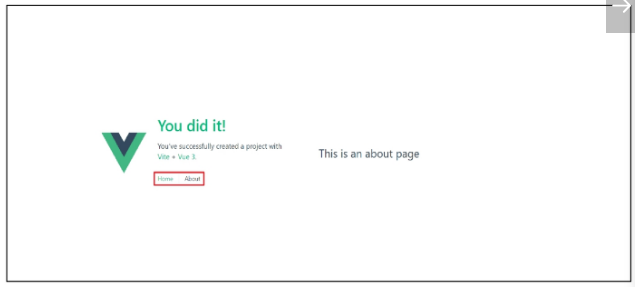

#### Vue 프로젝트 구조 변화 
1. App.vue 코드 변화 

2. router 폴더 신규 생성 
3. views 폴더 신규 생성

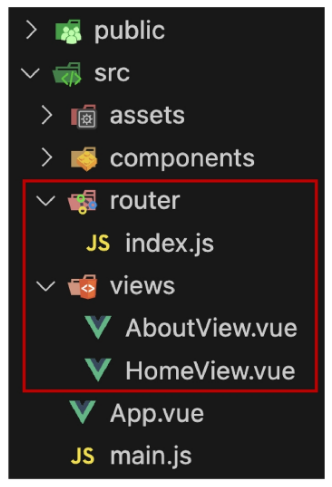

#### RouterLink 
- 페이지를 다시 로드 하지 않고 URL을 변경하여 URL 생성 및 관련 로직을 처리 

- HTML의 <a> 태그를 렌더링

    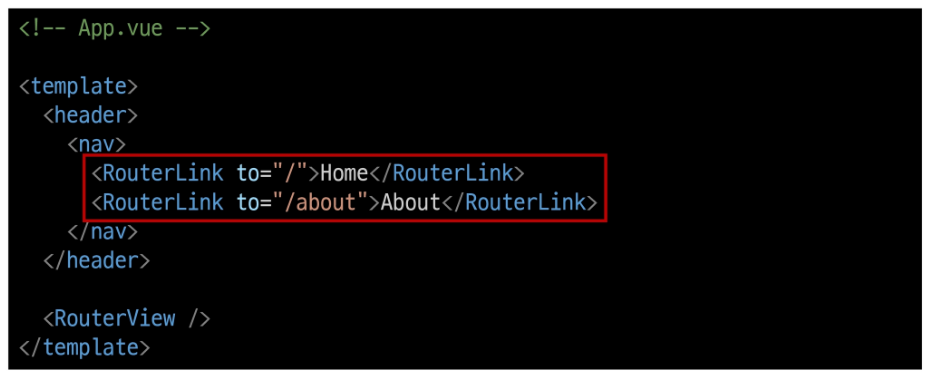

#### RouterView 
- RouterLink URL에 해당하는 컴포넌트를 표시 

- 원하는 곳에 배치하여 컴포넌트를 레이아웃에 표시 할 수 있음

    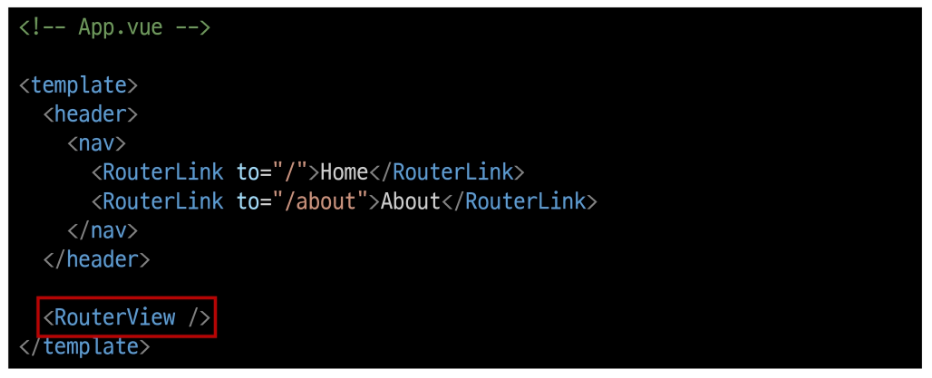

#### RouterLink와 RouterView
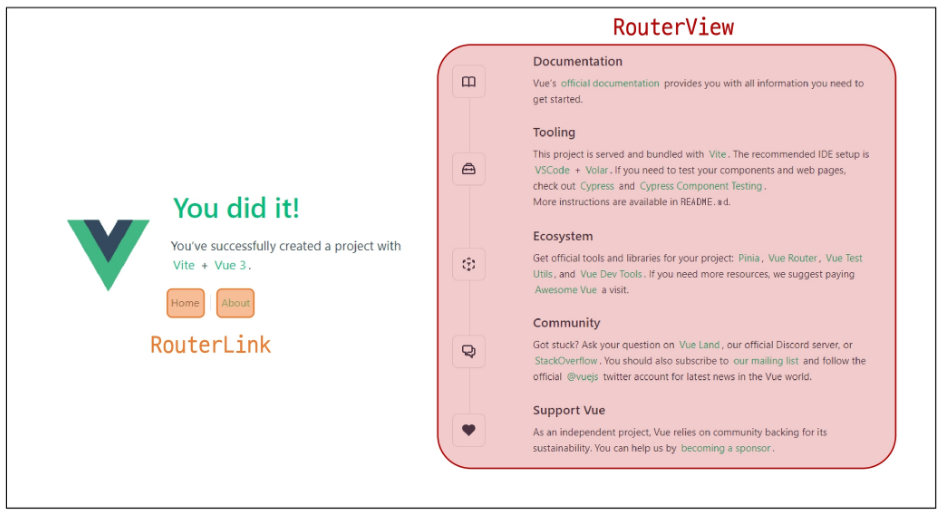

#### router/index.js 
- 라우팅에 관련된 정보 및 설정이 작성 되는 곳 

- router에 URL과 컴포넌트를 매핑

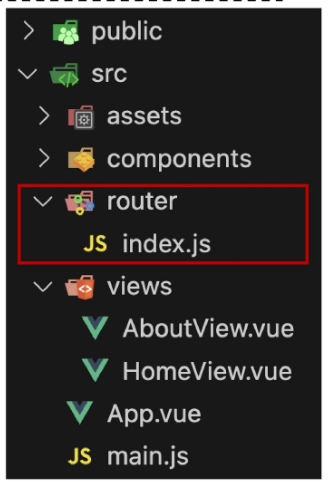

#### views 
- RouterView 위치에 렌더링 할 컴포넌트를 배치 
- 기존 components 폴더와 기능적으로 다른 것은 없으며 단순 분류의 의미로 구성됨 

- `반 컴포넌트와 구분하기 위해 컴포넌트 이름을 View로 끝나도록 작성하는 것을 권장`

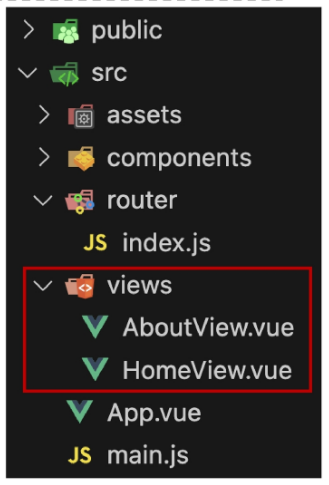

### Basic Routing

####라우팅 기본
1. index.js에 라우터 관련 설정 작성(주소, 이름, 컴포넌트)
```js
// index.js 

const router = createRouter({ 
    routes: [ 
        { 
            path: '/', 
            name: ' home', 
            component: HomeView 
        }, 
        ...
    ] 
})
```
2. RouterLink의 'to' 속성으로 index.js에서 정의한 주소 값(path)을 사용
```js
<!-- App.vue -->
<RouterLink to="/">Home</RouterLink> 
<RouterLink to="/about">About</RouterLink>
```
3. RouterLink 클릭 시 경로와 일치하는 컴포넌트가 RouterView에서 렌더링 됨
```html
<!-- App.vue -->
```
```js
<RouterView />
```

### Named Routes

#### Named Routes
경로에 이름을 지정하는 라우팅

#### Named Routes 예시 
- name 속성 값에 경로에 대한 이름을 지정 

- 경로에 연결하려면 RouterLink에 v-bind를 사용해 'to' props 객체로 전달

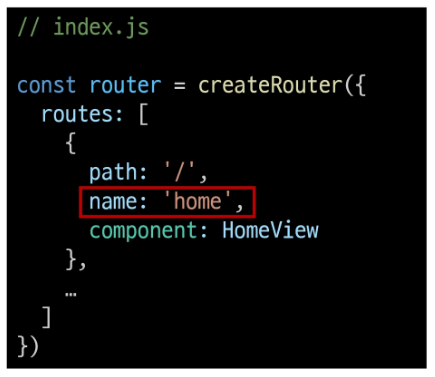

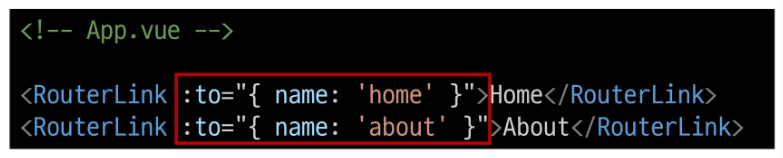

#### Named Routes 장점 
- 하드 코딩 된 URL을 사용하지 않아도 됨 

- URL 입력 시 오타 방지

### Dynamic Route Matching

#### Dynamic Route Matching 
URL의 일부를 변수로 사용하여 경로를 동적으로 매칭

- https://router.vuejs.org/guide/essentials/dynamic-matching.html

#### 매개변수를 사용한 동적 경로 매칭 
- 주어진 패턴 경로를 동일한 컴포넌트에 매핑 해야 하는 경우 활용

- 예를 들어 모든 사용자의 ID를 활용하여 프로필 페이지 URL을 설계 한다면? 
    - user/1 
    - user/2 
    - user/3 
    - >일정한 패턴의 URL 작성을 반복해야 함

#### 매개변수를 사용한 동적 경로 매칭 활용 
- views 폴더 내 UserView 컴포넌트 작성
```js
//UserView.vue

<template> 
    <div> 
        <h1>UserView</h1> 
    </div> 
</template>
```

- 매개변수는 콜론(“:”)으로 표기 
- UserView 컴포넌트 라우트 등록 
```js
// index.js 

import UserView from '../views/UserView. 

const router = createRouter({ 
    routes: [ 
        { 
            path: '/user/:id',
            name: 'user', 
            component: UserView 
        },
    ] 
})
```
- 매개변수는 객체의 params 속성의 객체 타입으로 전달 
- 단, 객체의 key 이름과 index.js에서 지정한 매개변수 이름이 같아야 함 
- > UserView 컴포넌트로 이동하기 위한 RouterLink 작성 
```js
// App.vue 

import { ref } from 'vue' 

const userId = ref(1) 

// App.vue

<RouterLink : to="{ name: 'user', params: {'id': userId} }">User</RouterLink>
```
- 경로가 일치하면 라우트의 매개변수는 컴포넌트에서 `$route.params`로 참조 가능 
- >현재 사용자의 id를 출력하기

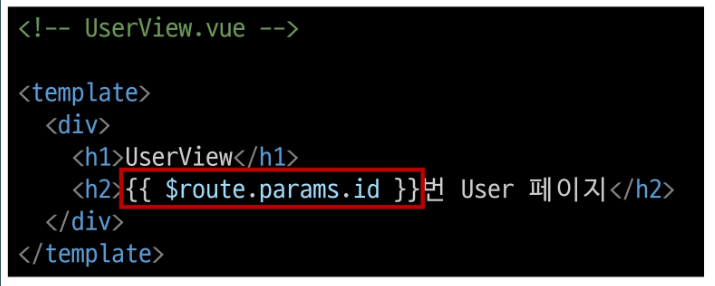

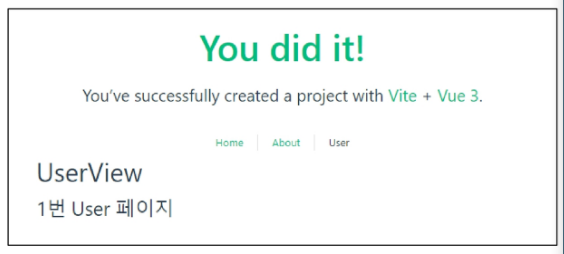

- useRoute() 함수를 사용해 스크립트 내에서 반응형 변수에 할당 후 템플릿에 출력하는 것을 권장 
- 템플릿에서 $route를 사용하는 것과 동일
```js
// UserView.vue

import { ref } from 'vue' 
import { useRoute } from 'vue-router' 

const route = useRoute() 
const userId = ref(route.params.id)
```

```html
<!-- UserView.vue -->
<template> 
    <div> 
        <h1>UserView</h1> 
        <h2>{{ userId }}번 User 페이지</h2> 
    </div> 
</template>
```

### Nested Routes

#### Nested Routes 
중첩된 라우팅

- https://router.vuejs.org/guide/essentials/nested-routes.html#Nested-Routes

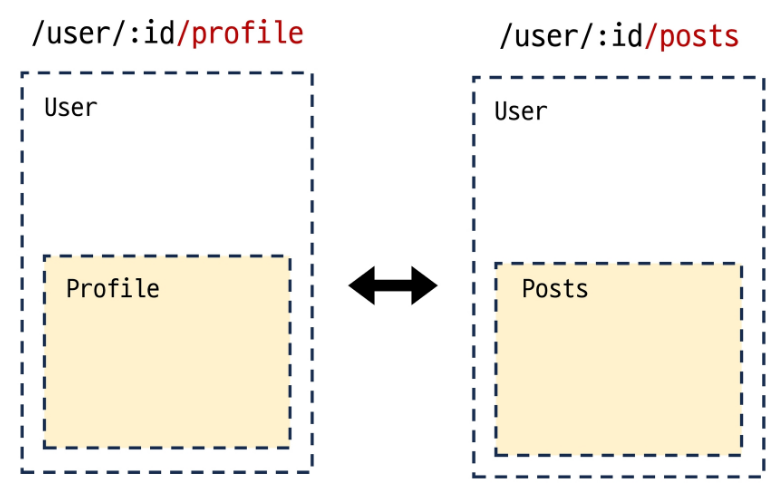

- 애플리케이션의 UI는 여러 레벨 깊이로 중첩된 컴포넌트로 구성되기도 함 

- 이 경우 URL을 중첩된 컴포넌트의 구조에 따라 변경되도록 이 관계를 표현할 수 있음

#### 중첩된 라우팅 활용
- 컴포넌트 생성 

- >components 폴더에 UserProfile, UserPosts 컴포넌트 작성 
```html
<!-- UserProfile.vue -->

<template> 
    <div> 
        <h1>UserProfile</h1> 
    </div> 
</template> 

 <!-- UserPosts.vue -->

<template> 
    <div> 
        <h1>UserPosts</h1> 
    </div> 
</template>
```

- 라우터 등록 

- index.js에 두 컴포넌트를 import 
```js
// index.js

import UserProfile from '@/components/UserProfile.vue' 
import UserPosts from '@/components/UserPosts.vue'
```

##### children 옵션 
children 옵션은 배열 형태로 필요한 만큼 중첩 관계를 표현할 수 있음

#### 중첩된 라우팅 활용
- "children" 옵션을 사용해 중첩된 라우터에 컴포넌트를 등록

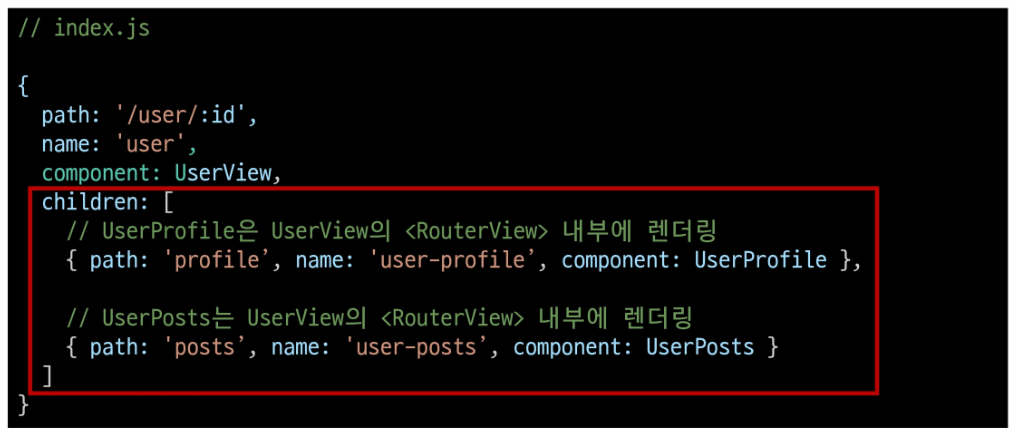

- 두 컴포넌트에 대한 RouterLink 및 RouterView 작성

```html
<!-- UserView.vue -->
```
```js
<template> 
    <div> 
        <RouterLink:to="{ name: 'user-profile' }">Profile</RouterLink>
        <RouterLink:to="{ name: 'user-posts' }">Posts</RouterLink>
        <h1>UserView</h1> 
        <h2>{{ userId }}번 User 페이지</h2> 
        <hr> 
        <RouterView /> 
        </div> 
</template>
```
- Profile과 Posts 링크를 클릭해서 렌더링 결과 확인

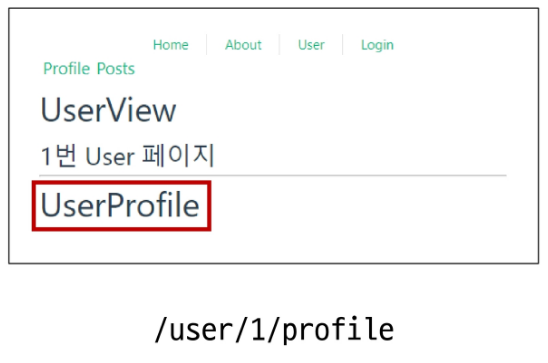

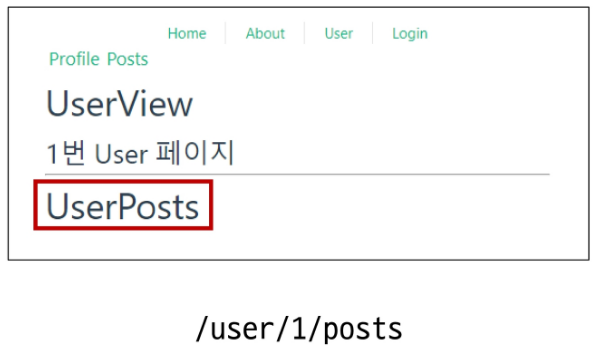

- 중첩된 Named Routes를 다룰 때는 일반적으로 “하위 경로에만 이름을 지정"

- 이렇게 하면/user/:id로 이동했을 때 항상 중첩된 경로가 표시됨

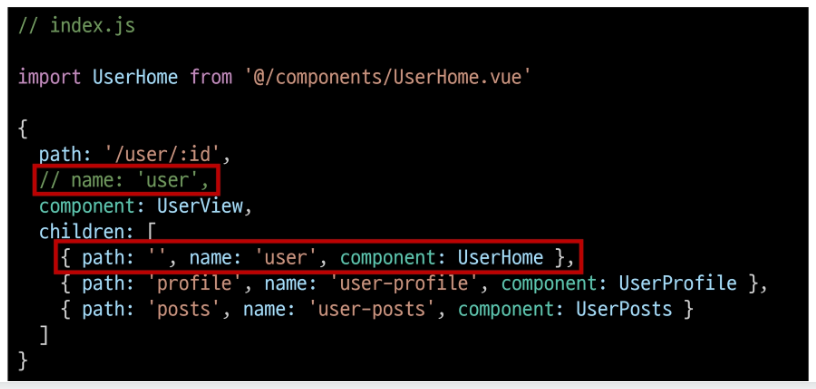

- UserHome 컴포넌트 생성 
```html
<!-- components/UserHome.vue -->
 <template> 
    <div> 
        <h1>UserHome</h1> 
    </div> 
</template> 

<script setup>
</script>
```

- 이제/user/: id 접속 시 중첩된 경로가 표시 

- 단, 이전처럼 상위 경로의 이름을 유지하는 구조로 작성해도 무관

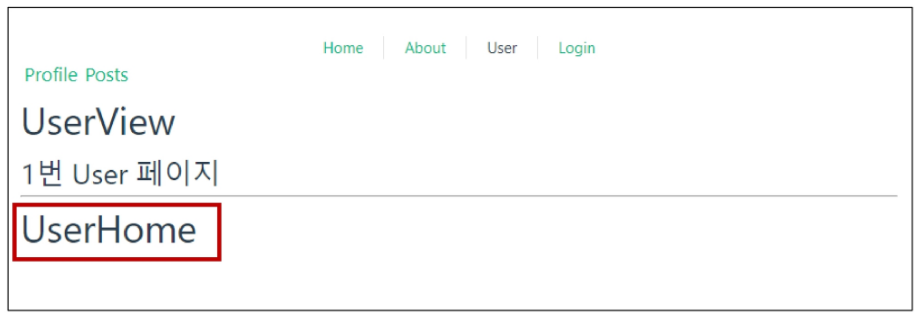

#### ※주의※ 중첩된 라우팅 

컴포넌트 간 부모-자식 관계 관점이 아닌 URL에서의 중첩된 관계를 표현하는 관점으로 바라보기

### Programmatic Navigation

#### Programmatic Navigation 

RouterLink 대신 JavaScript를 사용해 페이지를 이동하는 것

- https://router.vuejs.org/guide/essentials/navigation.html#Programmatic-Navigation

#### 프로그래밍 방식 네비게이션 
- 프로그래밍으로 URL 이동하기 

- router의 인스턴스 메서드를 사용해 RouterLink로 `<a>` 태그를 만드는 것처럼 프로그래밍으로 네비게이션 관련 작업을 수행할 수 있음

#### router의 메서드

1. 다른 위치로 이동하기 
   - router.push() 

2. 현재 위치 바꾸기 
   - router.replace()

##### router.push() 
다른 위치로 이동하기 (Navigate to a different location)

- 다른 URL로 이동하는 메서드 

- 새 항목을 `history stack`에 push하므로 사용자가 브라우저 뒤로 가기 버튼을 클릭하면 이전 URL로 이동할 수 있음 
- RouterLink를 클릭했을 때 내부적으로 호출되는 메서드이므로 RouterLink를 클릭하는 것은 router.push()를 호출하는 것과 같음

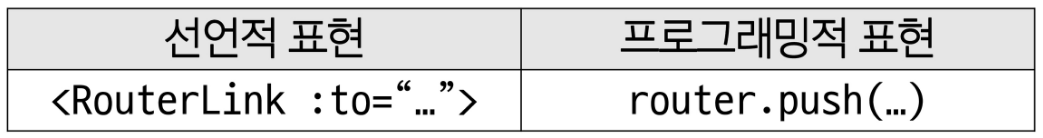

##### router.push 활용
- UserView 컴포넌트에서 HomeView 컴포넌트로 이동하는 버튼 만들기

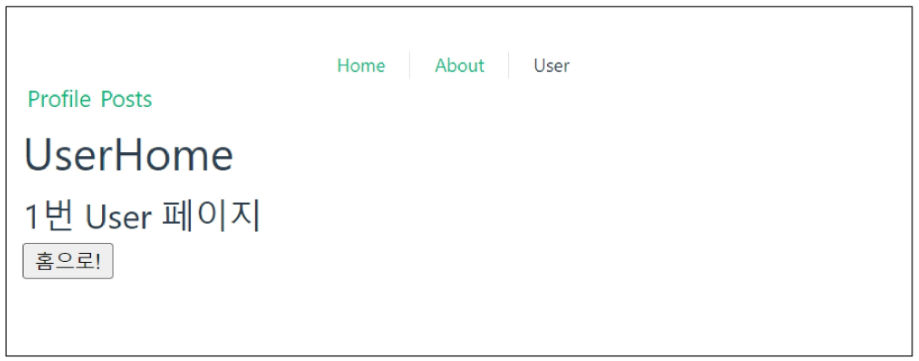

- UserView 컴포넌트에서 HomeView 컴포넌트로 이동하는 버튼 만들기
```js
// UserView.vue 

import { useRoute, useRouter } from 'vue-router' 

const router = useRouter() 

const goHome = function() { 
    router.push({ name: 'home' })
}
```
```html
<!-- UserView.vue --> 
 
<button @click="goHome">홈으로!</button>
```

##### router.replace() 

현재 위치 바꾸기 (Replace current location)

- push 메서드와 달리 history stack에 새로운 항목을 push 하지 않고 다른 URL로 이동 (=== 이동 전 URL로 뒤로 가기 불가)

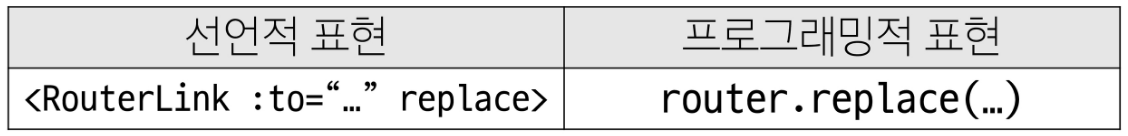

##### router.replace 활용 
UserView 컴포넌트에서 HomeView 컴포넌트로 이동하는 버튼 만들기

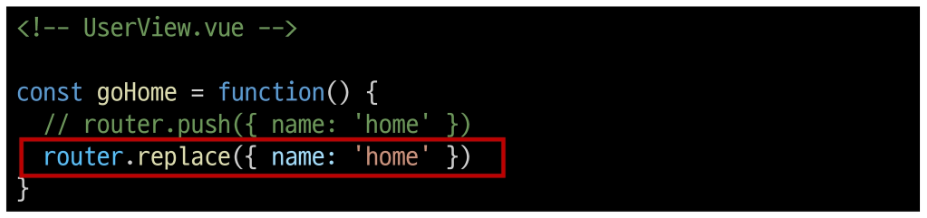

##### [참고] router.push의 인자 활용 
https://router.vuejs.org/guide/essentials/navigation.html 
```js
// literal string path 
router.push('/users/alice') 

// object with path 
router.push({ path: '/users/alice' }) 

// named route with params to let the router build the url 
router.push({ name: 'user', params: { username: 'alice' } }) 

// with query, resulting in /register?plan=private 
router.push({ path: '/register', query: { plan: 'private' } })
```

## Navigation Guard

### 개요

#### Navigation Guard 

Vue router를 통해 특정 URL에 접근할 때 다른 URL로 redirect를 하거나 취소하여 내비게이션을 보호 

- > 라우트 전환 전/후 자동으로 실행되는 Hook 

- https://router.vuejs.org/guide/advanced/navigation-guards.html

#### Navigation Guard 종류 
1. Globally (전역 가드) 
    - 애플리케이션 전역에서 모든 라우트 전환에 적용되는 가드 

2. Per-route (라우터 가드) 
    - 특정 라우트에만 적용되는 가드 
3. In-component (컴포넌트 가드) 
    - 컴포넌트 내에서만 적용되는 가드

### Globally Guard

#### Globally Guard 
애플리케이션 전역에서 동작하는 가드 
- > 작성위치: index.js

#### Globally Guard 종류 

- beforeEach() <= 얘만 씀

- beforeResolve() 
- afterEach()

#### router.beforeEach() 
다른 URL로 이동하기 직전에 실행되는 함수 (Global Before Guards)

#### router beforeEach 구조 
```js
router.beforeEach((to, from) => {
    ...
    return false 또는 return { name: 'About' }
})  
```
- 모든 가드는 2개의 인자를 받음 
    - to : 이동 할 URL 정보가 담긴 Route 객체 
    - from: 현재 URL 정보가 담긴 Route 객체

- 선택적으로 다음 값 중 하나를 반환 
    1. false 
        - 현재 내비게이션을 취소 
        - 브라우저 URL이 변경된 경우(사용자가 수동으로 또는 뒤로가기 버튼을 통해) 'from' 경로의 URL로 재설정 

    2. Route Location 
        - router.push()를 호출하는 것처럼 경로 위치를 전달하여 다른 위치로 redirect 
        - return이 없다면 자동으로 'to' URL Route 객체로 이동

#### router beforeEach 예시
1. 전역 가드 beforeEach 작성 

2. HomeView에서 UserView로 이동 했을 때 각 인자 값 출력 확인하기

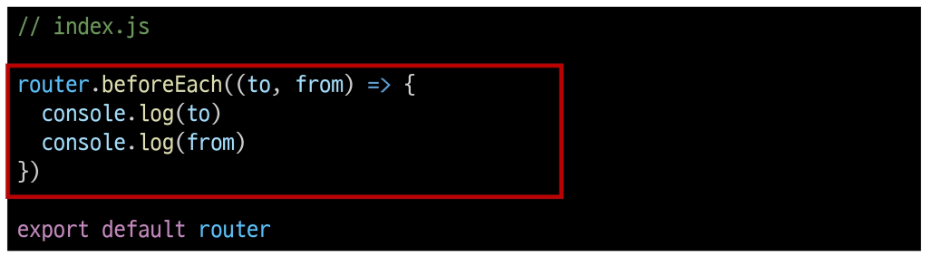

- Home에서 User로 이동해보기 

- > to에는 이동할 URL인 user 라우트에 대한 정보가, from에는 현재 URL인 home 라우트에 대한 정보가 들어있음

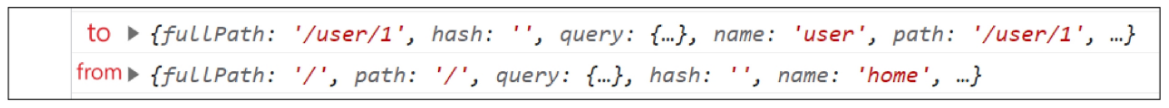

#### router.beforeEach 활용
- "Login이 되어있지 않다면 페이지 진입을 막고 Login 페이지로 이동시키기"

- LoginView 컴포넌트 작성 및 라우트 등록
```html
<!-- LoginView.vue -->
<template>   
    <div>  
        <h1>Login View</h1>
    </div> 
</template>
```
```js
// index.js

import LoginView from '@/views/LoginView.vue'

{ 
    path: '/login',
    name: 'login', 
    component: LoginView, 
}, 

// App.vue 

<RouterLink:to="{ name: 'login'}">Login</RouterLink>
```
- 어떤 RouterLink를 클릭해도 LoginView 컴포넌트만 볼 수 있음

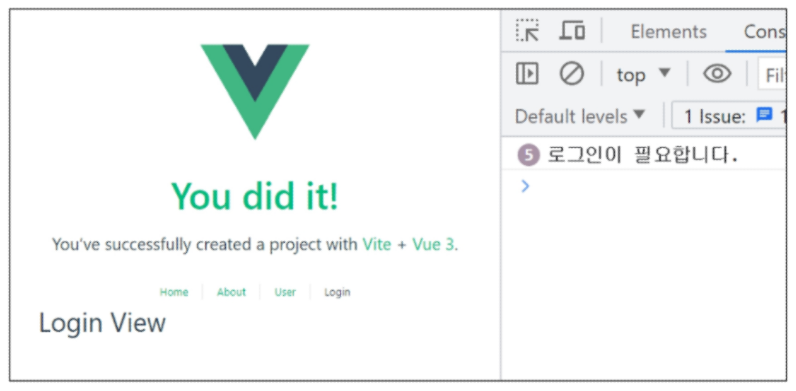

- 만약 로그인이 되어있지 않고(1), 이동하는 주소 이름이 login이 아니라면(2) login 페이지로 redirect 
```js
// index.js 

router.beforeEach((to, from) => { 
    const isAuthenticated = false 
    } 
    
    if (!isAuthenticated && to.name !== 'login') { 
        console.log('로그인이 필요합니다.') 
        return { name: 'login' }
    }
}) 

### Per_route Guard

### Per-route Guard 
특정 라우터에서만 동작하는 가드 

- >작성위치: index.js의 각 routes

#### Per-route Guard 종류 
beforeEnter()

#### router.beforeEnter() 
특정 route에 진입했을 때만 실행되는 함수 

- > 단순히 URL의 매개변수나 쿼리 값이 변경될 때는 실행되지 않고, 다른 URL에서 탐색해 올 때만 실행됨

#### router.beforeEnter 구조 

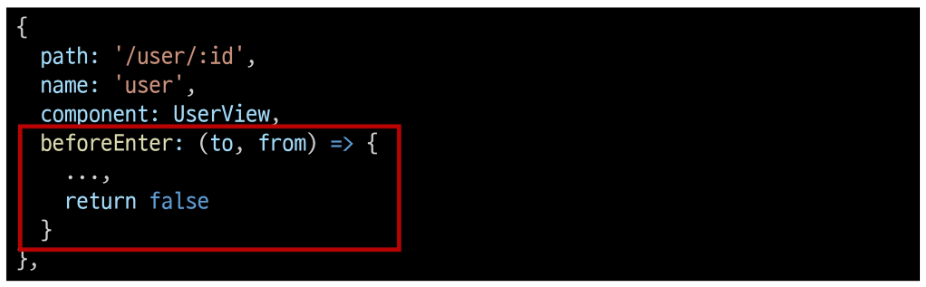

- routes 객체에서 정의

#### router.beforeEnter 예시
1. 라우터 가드 beforeEnter 작성 

2. HomeView에서 UserView로 이동 후 각 인자 값 출력 확인하기

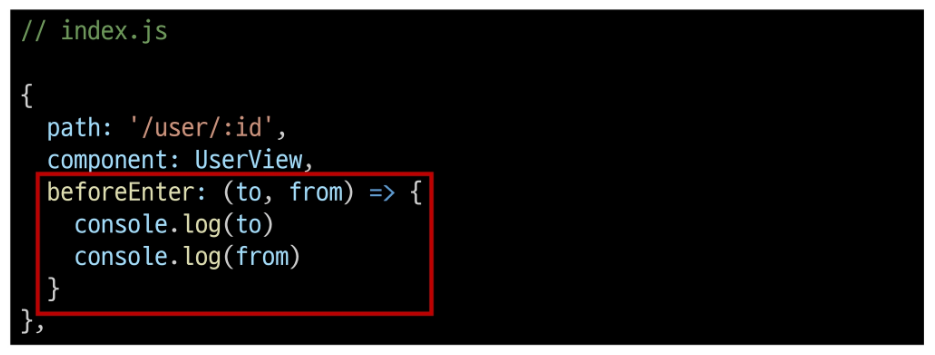

- to에는 이동할 URL인 user 라우트에 대한 정보가, from에는 현재 URL인 home 라우트에 대한 정보가 들어있음 

- 다른 경로에서 user 라우트를 탐색 했을 때 실행된 것

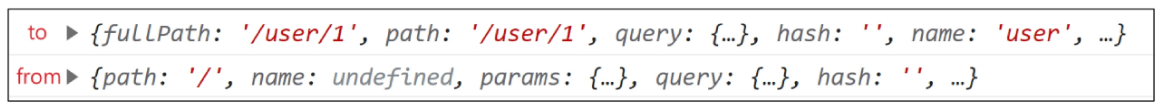

#### router beforeEnter 활용 
- “이미 로그인 한 상태라면 LoginView 진입을 막고 HomeView로 이동 시키기" 

- >전역 가드 beforeEach 관련 코드는 주석 처리 후 진행

- 로그인 상태라면 HomeView로 이동 

- 로그인 상태가 아니라면 LoginView로 이동
```js
// index.js 

const isAuthenticated = true 

const router = createRouter({ 
    routes: [ 
        { 
            path: '/login', 
            name: 'login', 
            component: LoginView, 
            beforeEnter: (to, from) => { 
                if (isAuthenticated === true) { 
                    console.log('이미 로그인 상태입니다.') 
                    return { name: 'home' }
                } 
            } 
        }, 
        ...
```

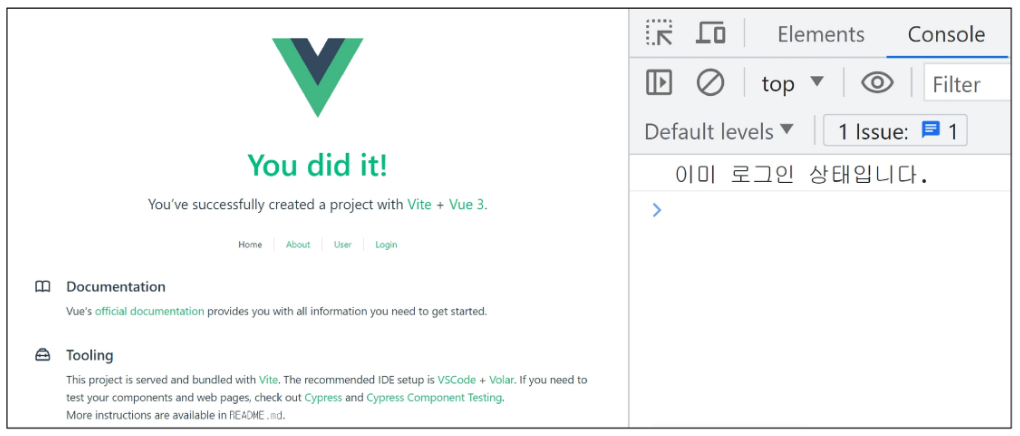

### In-component Guard

#### In-component Guard 
특정 컴포넌트 내에서만 동작하는 가드 

- > 작성위치: 각 컴포넌트의 `<script>` 내부

#### In-component Guard 종류 
- onBeforeRouteLeave() 
    - 현재 라우트에서 다른 라우트로 이동하기 전에 실행 
    - > 사용자가 현재 페이지를 떠나는 동작에 대한 로직을 처리 

- onBeforeRouteUpdate() 
    - 이미 렌더링 된 컴포넌트가 같은 라우트 내에서 업데이트 되기 전에 실행 
    - > 라우트 업데이트 시 추가적인 로직을 처리

#### onBeforeRouteLeave 활용 
- "사용자가 UserView를 떠날 시 팝업 창 출력하기"

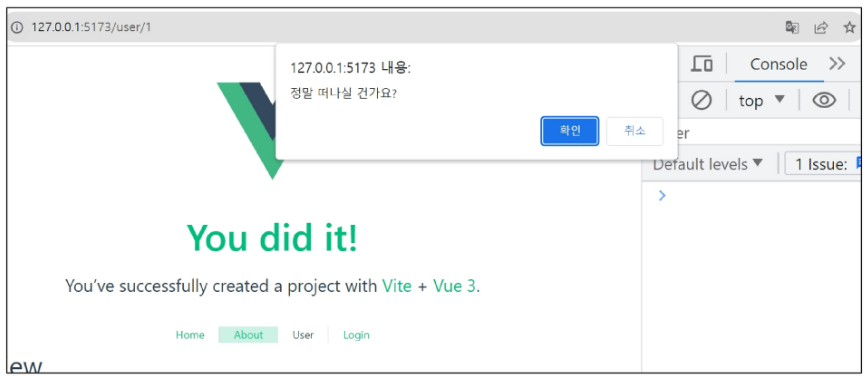

- "사용자가 UserView를 떠날 시 팝업 창 출력하기"

```js
// UserView.vue 

import { onBeforeRouteLeave } from 'vue-router' 

onBeforeRouteLeave ((to, from) => { 
    const answer = window.confirm('정말 떠나실 건가요?') 
    if (answer === false) { 
        return false 
    } 
})
```

#### onBeforeRouteUpdate 활용
- "UserView 페이지에서 다른 id를 가진 User의 UserView 페이지로 이동하기"

- > 같은 라우트 내에서 업데이트 되는 경우 (/user/1 -> /user/100)

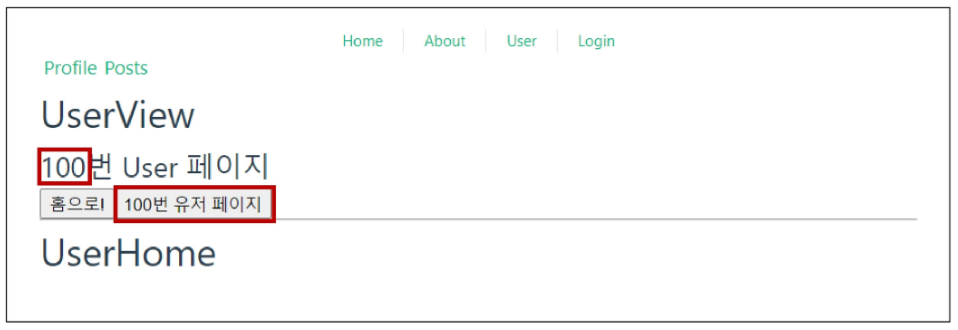

- "UserView 페이지에서 다른 id를 가진 User의 UserView 페이지로 이동하기"
```html
<!-- UserView.vue --> 
 
<button @click="routeUpdate">100번 유저 페이지</button> 
```
```js
// UserView.vue

import { onBeforeRouteLeave, onBeforeRouteUpdate } from 'vue-router' 

const routeUpdate = function () { 
    router.push({ name: 'user', params: { id: 100 } }) 
} 

onBeforeRouteUpdate((to, from) => { 
    userId.value = to.params.id 
})
```

#### 만약 onBeforeRouteUpdate를 사용하지 않았다면?
-  onBeforeRouteUpdate에서 userId를 변경하지 않으면 userId는 갱신되지 않음 

- 컴포넌트가 재사용 되었기 때문

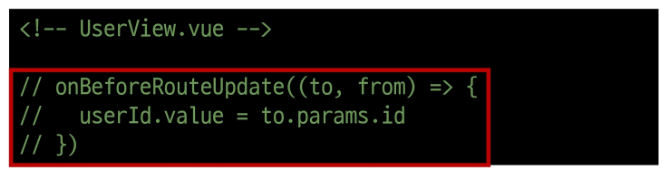

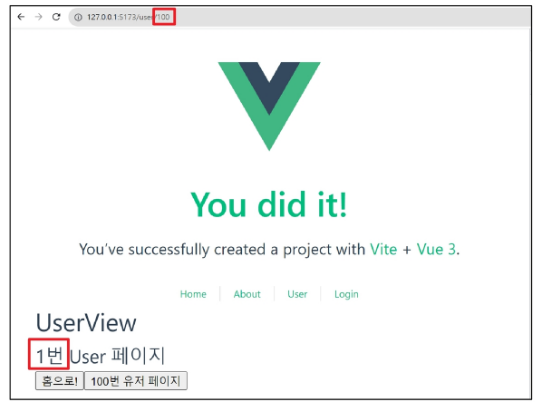

#### Navigation Guard 정리 
1. Globally (전역 가드) 
   - 애플리케이션 전역에서 동작 
   - 작성위치: `index.js` 

2. Per-route (라우터 가드) 
   - 특정 route에서만 동작 
   - 작성위치: `index.js의 각 routes` 

3. In-component (컴포넌트 가드) 
   - 특정 컴포넌트 내에서만 동작 
   - 작성위치: `각 컴포넌트의 script`

## 참고

### Lazy Loading Routes

#### Lazy Loading Routes
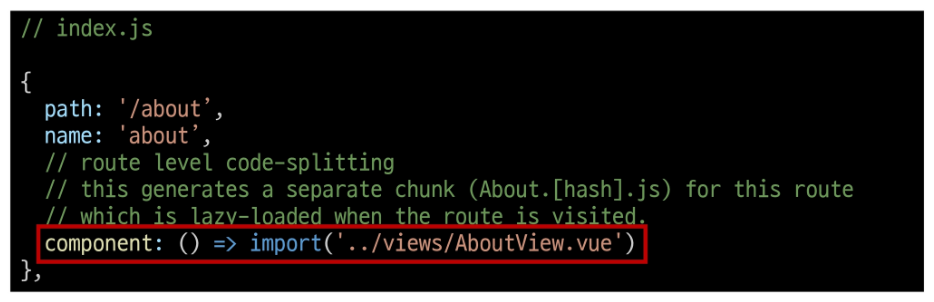

- Vue 애플리케이션 첫 빌드 시 해당 컴포넌트를 로드 하지 않고, “해당 경로를 처음으로 방문할 때 컴포넌트를 로드" 하는 것 

- > 앱을 빌드할 때 처음부터 모든 컴포넌트를 준비하면 컴포넌트의 크기에 따라 페이지 로드 시간이 길어질 수 있기 때문